# Stock Screening : Fundamentals and Technical Indicators

I've done basic stock data modelling, future price prediction using quandl and fbprophet. Also I have used Stocker (courtsey: William Koehrsen) which is a brilliant stock explorer library that helps you create a nice pricing model for a stock. 
It's time to take it up a notch. Now I want my notebooks to be interactive, take input from the user and accordingly change the results displayed in my notebook.

Our idea here is to get live quotes for a stock and also prepare a dashboard that has the fundamentals as well as basic technical indicators for that stock.

Importing necessary libraries to get live stock quotes and run a basic Tech analysis for that stock. 

In [1]:
from ipywidgets import widgets
import requests
import json
import time
from io import StringIO

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import datetime

import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import os
from bs4 import BeautifulSoup

import quandl
quandl.ApiConfig.api_key = "sY8rR9LTz4kT5z2cs94v" #set API key

#Importing all classes from screener.py
from screener import *

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
now = datetime.datetime.now()


C:\Users\133924\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
from IPython.display import display
stock_symbol = widgets.Text()
exchange_name = widgets.Text()
submit_button = widgets.Button(description = "Get Quotes")

In [3]:
def on_submit(b):
    exchange = exchange_name.value.upper()
    symbol = stock_symbol.value.upper()
    
    a = AlphaFinanceAPI()
    stock_quotes = a.get(symbol.upper())
    
    q = Quandl()
    u = Utils()
    g = u.choose_exchange(exchange)
    stock_hist = g.get_historical(exchange,symbol)
    print('\n'+symbol+' Current Price : {}\n'.format(stock_quotes['4. close']))
    print('\nOpening Price : {}\n'.format(stock_hist.iloc[-1]['Close']))
    
    if exchange == 'NSE':
        print('\n')
        print(symbol+" Fundamentals: \n")
        f = Fundamentals()
        f.get_screener(symbol)
    print('\nHistorical Candlestick chart(beginning FY14):\n')
    q.plot(stock_hist)

Enter exchange name and stock/ticker symbol (in that order) for the stock's fundamentals that you want to analyse. Here I enter the exchange name NASDAQ and stock TSLA.

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget


TSLA Current Price : 295.7196


Opening Price : 295.07


Historical Candlestick chart(beginning FY14):



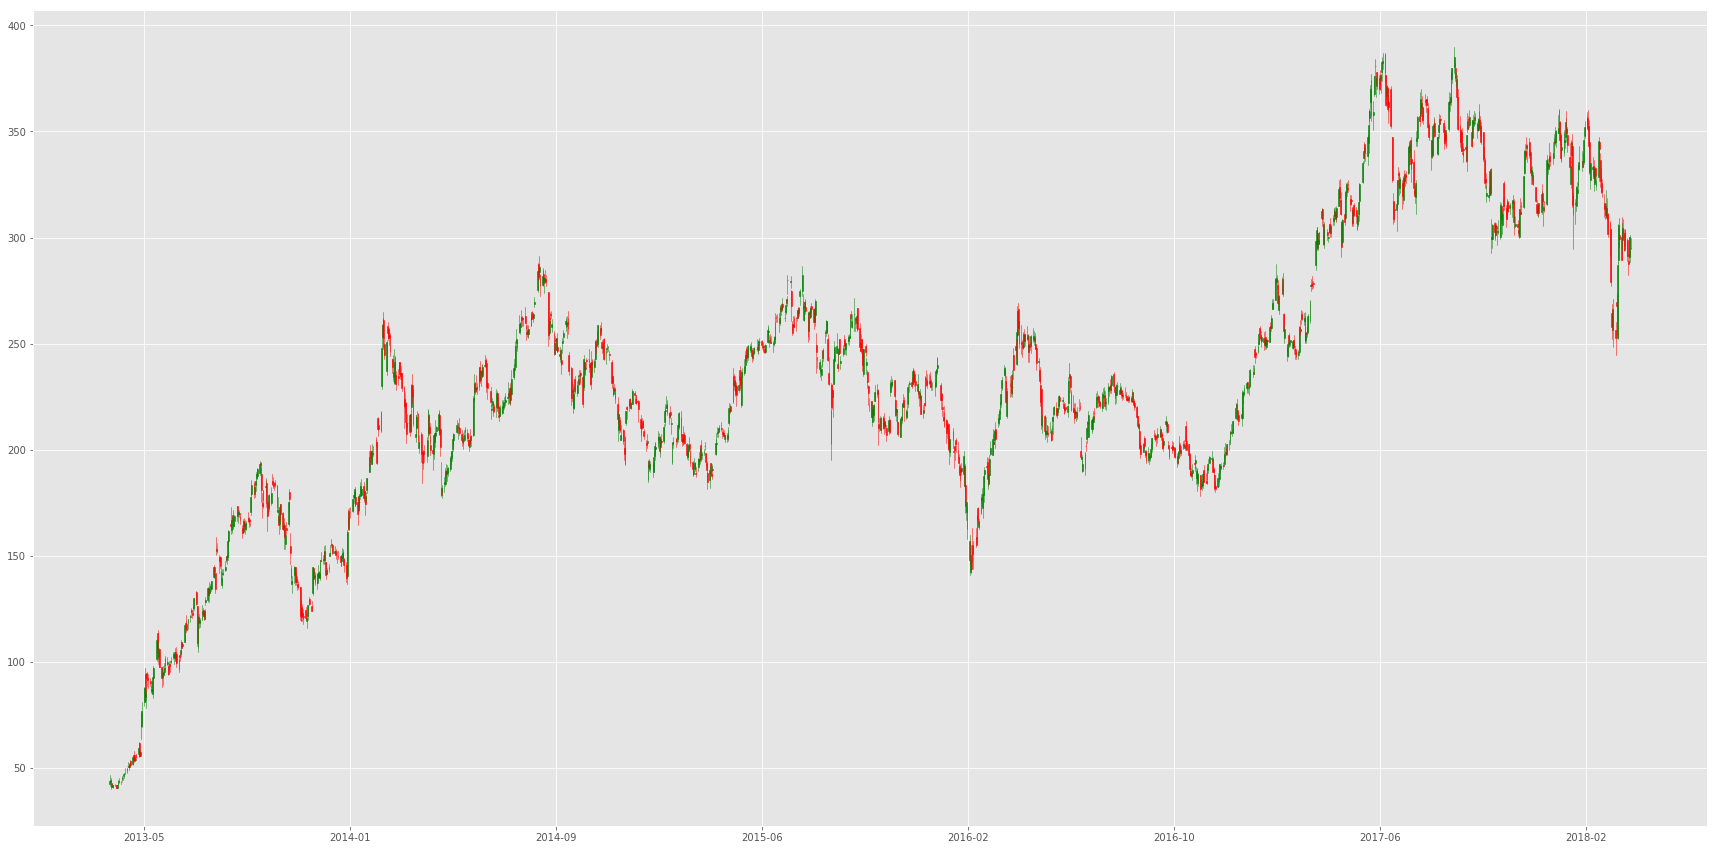

In [4]:
display(exchange_name)
display(stock_symbol)
display(submit_button)

submit_button.on_click(on_submit)

In [5]:
fund_button = widgets.Button(description = 'Fundamentals')

def click_fundamentals(b):
    exchange = exchange_name.value.upper()
    symbol = stock_symbol.value.upper()
    print(symbol+" Fundamentals: ")
    f = Fundamentals()
    f.get_traview(exchange,symbol)


In [6]:
display(fund_button)
fund_button.on_click(click_fundamentals)

A Jupyter Widget

TSLA Fundamentals: 
('Price History', ['Average Volume (10 day)8.32M', 'Beta - 1 Year1.1216', '52 Week High389.6100', '52 Week Low244.5901'])


('Valuation', ['Average Volume (10 day)8.32M', 'Beta - 1 Year1.1216', '52 Week High389.6100', '52 Week Low244.5901', 'Market Cap49.553B', 'Enterprise Value (MRQ)56.5B', 'Enterprise Value/EBITDA (TTM)14424.2242', 'Total Shares Outstanding (MRQ)168.797M', 'Number of Employees37.543K', 'Number of Shareholders1.156K', 'Price to Earnings (TTM)---', 'Price to Revenue (TTM)4.2141', 'Price to Book (FY)11.9541', 'Price to Sales (FY)4.2141'])


('Dividends', ['Average Volume (10 day)8.32M', 'Beta - 1 Year1.1216', '52 Week High389.6100', '52 Week Low244.5901', 'Market Cap49.553B', 'Enterprise Value (MRQ)56.5B', 'Enterprise Value/EBITDA (TTM)14424.2242', 'Total Shares Outstanding (MRQ)168.797M', 'Number of Employees37.543K', 'Number of Shareholders1.156K', 'Price to Earnings (TTM)---', 'Price to Revenue (TTM)4.2141', 'Price to Book (FY)11.9541', 'Price to 

In [7]:
cci_button = widgets.Button(description = 'CCI')
rsi_button = widgets.Button(description = 'RSI')
ewma_button = widgets.Button(description = 'EWMA')
macd_button = widgets.Button(description='MACD')


def click_cci(b):
    exchange = exchange_name.value.upper()
    symbol = stock_symbol.value.upper()
    print('Commodity Channel Index(CCI)\n')
    t = TechIndicators()
    u = Utils()
    q = u.choose_exchange(exchange)
    stock_hist = q.get_historical(exchange,symbol)
    cci = t.CCI(stock_hist)
    t.plot(stock_hist,cci)

def click_rsi(b):
    exchange = exchange_name.value.upper()
    symbol = stock_symbol.value.upper()
    print('\nRelative Strength Index(RSI)\n')
    t = TechIndicators()
    u = Utils()
    q = u.choose_exchange(exchange)
    stock_hist = q.get_historical(exchange,symbol)
    rsi = t.RSI(stock_hist)
    t.plot(stock_hist,rsi)
    
def click_ewma(b):
    exchange = exchange_name.value.upper()
    symbol = stock_symbol.value.upper()
    print('\nExponential Weighted moving Average(EWMA)\n')
    t = TechIndicators()
    u = Utils()
    q = u.choose_exchange(exchange)
    stock_hist = q.get_historical(exchange,symbol)
    t.EWMA(stock_hist)
    
def click_macd(b):
    exchange = exchange_name.value.upper()
    symbol = stock_symbol.value.upper()
    print('\nMoving Average Convergence Divergence(MACD)\n')
    t = TechIndicators()
    u = Utils()
    q = u.choose_exchange(exchange)
    stock_hist = q.get_historical(exchange,symbol)
    t.MACD(stock_hist)
    


Enter the exchange name and stock symbol in the space above and use the buttons for respective technical indicators

A Jupyter Widget

A Jupyter Widget

Commodity Channel Index(CCI)



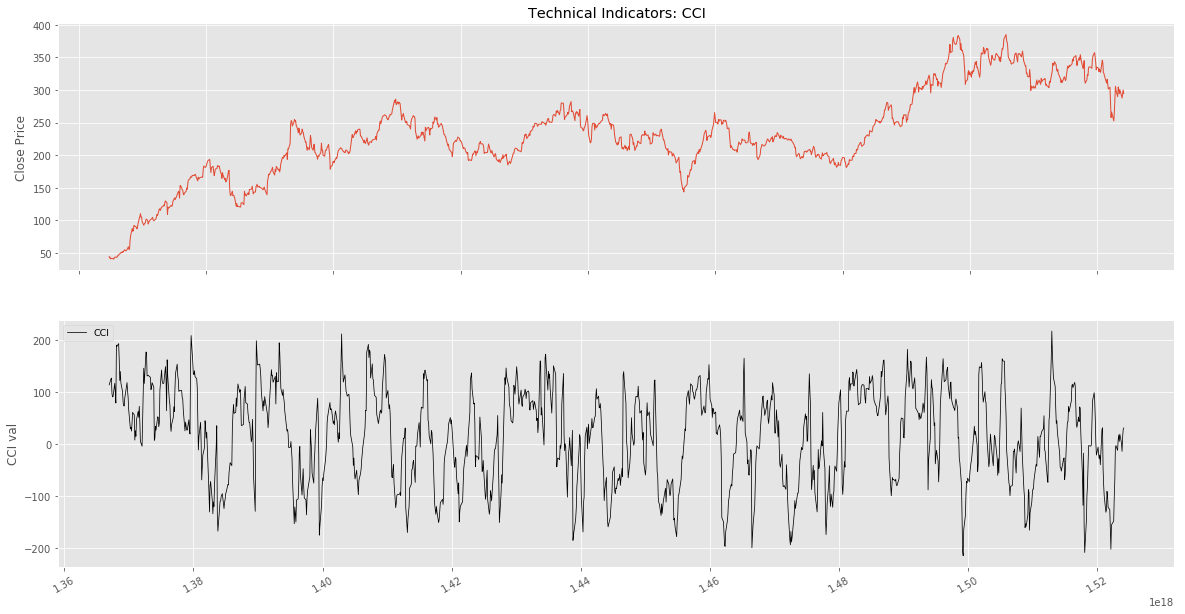


Relative Strength Index(RSI)



C:\Users\133924\Documents\Hitachi Consulting\Financial Analytics\stock-screener\screener.py:226: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=14,min_periods=0,adjust=True,ignore_na=False).mean()
  upi = pd.ewma(up,self.rsi_period)
C:\Users\133924\Documents\Hitachi Consulting\Financial Analytics\stock-screener\screener.py:227: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=14,min_periods=0,adjust=True,ignore_na=False).mean()
  doi = pd.ewma(down.abs(),self.rsi_period)


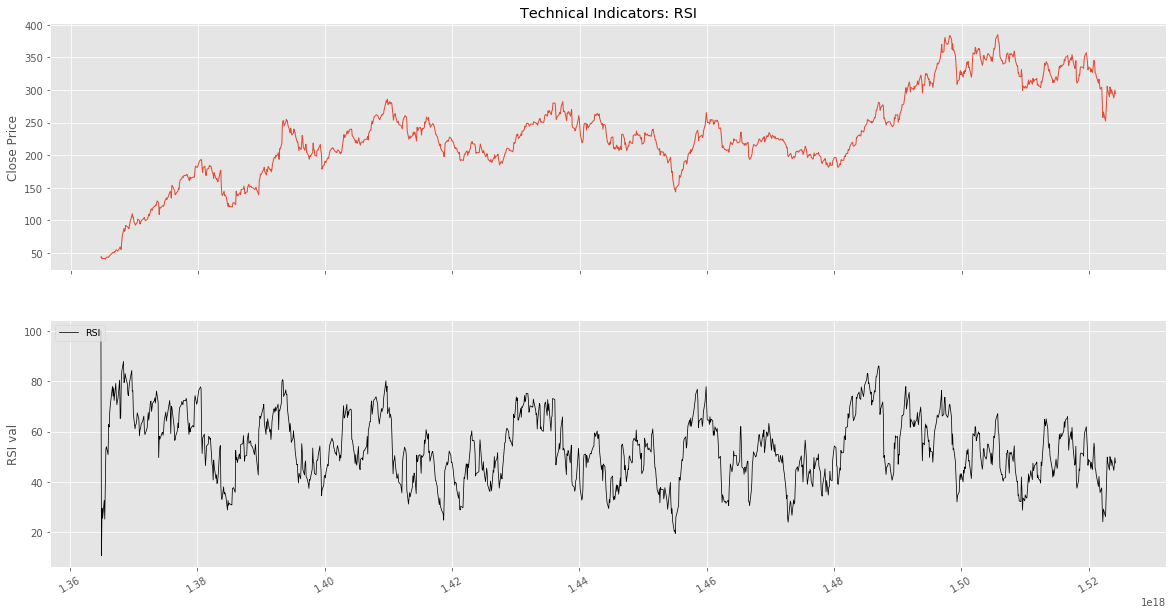

In [8]:
display(cci_button)
display(rsi_button)

cci_button.on_click(click_cci)
rsi_button.on_click(click_rsi)

A Jupyter Widget


Exponential Weighted moving Average(EWMA)



C:\Users\133924\Documents\Hitachi Consulting\Financial Analytics\stock-screener\screener.py:233: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=15,min_periods=0,adjust=True,ignore_na=False).mean()
  df['EWMA'] = pd.ewma(df['Close'], span = self.ewma_span)


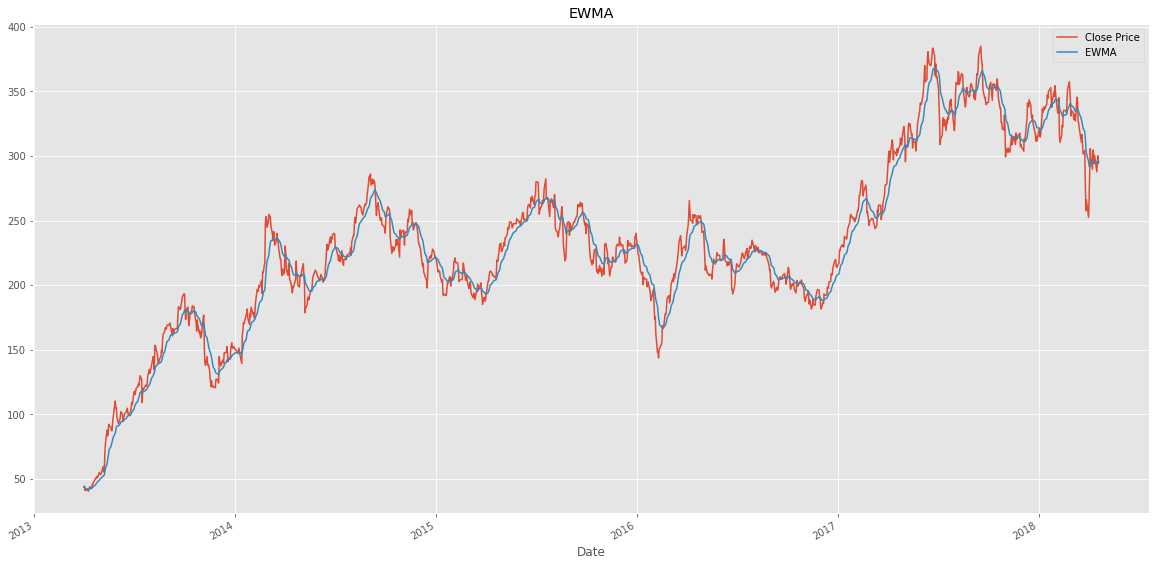

In [9]:
display(ewma_button)
ewma_button.on_click(click_ewma)


A Jupyter Widget


Moving Average Convergence Divergence(MACD)



C:\Users\133924\Documents\Hitachi Consulting\Financial Analytics\stock-screener\screener.py:239: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
  ema_fast = pd.ewma(df['Close'], span=self.ewma_fast)
C:\Users\133924\Documents\Hitachi Consulting\Financial Analytics\stock-screener\screener.py:240: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=26,min_periods=0,adjust=True,ignore_na=False).mean()
  ema_slow = pd.ewma(df['Close'], span=self.ewma_slow)
C:\Users\133924\Documents\Hitachi Consulting\Financial Analytics\stock-screener\screener.py:242: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=9,min_periods=0,adjust=True,ignore_na=False).mean()
  macd_signal= pd.ewma(df['MACD'], span=self.ewma_signal)


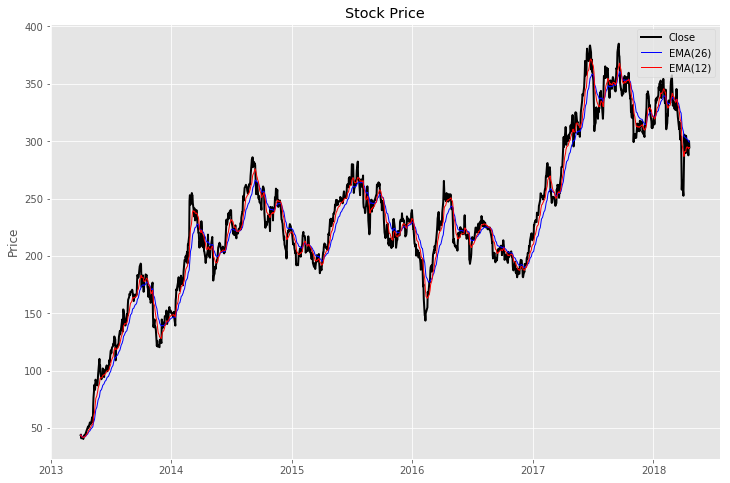

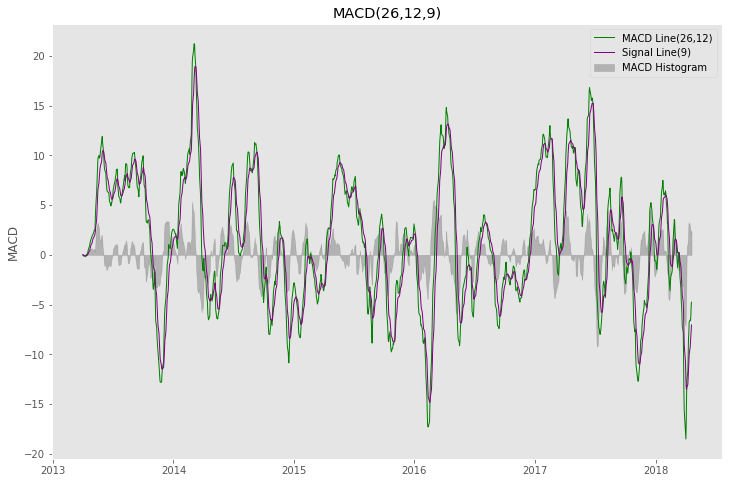

In [10]:
display(macd_button)
macd_button.on_click(click_macd)